In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

# Phase plane analysis of dynamical systems
When we have a system of two differential equations in two variables, $\mathbf{x}' = \mathbf{f}(\mathbf{x})$ we have a very useful analysis technique available to us, that of the *phase plane*. The phase plane is a two-dimensional plot with the two state variables of the ODE system on the axes. Each point on the plane corresponds to a particular choice of $\mathbf{x}$ at which we can compute a velocity vector $\mathbf{x}'$ and plot it on the graph (if we like) as an arrow originating at $\mathbf{x}$.

### Example: Fitzhugh-Nagumo equations
We're going to use the Fitzhugh-Nagumo equations as our example:
\begin{equation}
  \begin{split}
     \epsilon \frac{dv}{dt} &= f(v) - w + I_{\text{app}} \\
     \frac{dw}{dt} &= v - \gamma w
  \end{split}
\end{equation}
where
\begin{equation*}
  f(v) = v(1 - v)(v - \alpha)
\end{equation*}
and $0 < \alpha < 1$, $\epsilon \ll 1$. We'll use $\alpha = 0.1$, $\gamma = 0.5$, and $\epsilon = 0.01$ for this example.

Below we're going to define our equations in code so we can use them to illustrate various things about the system.

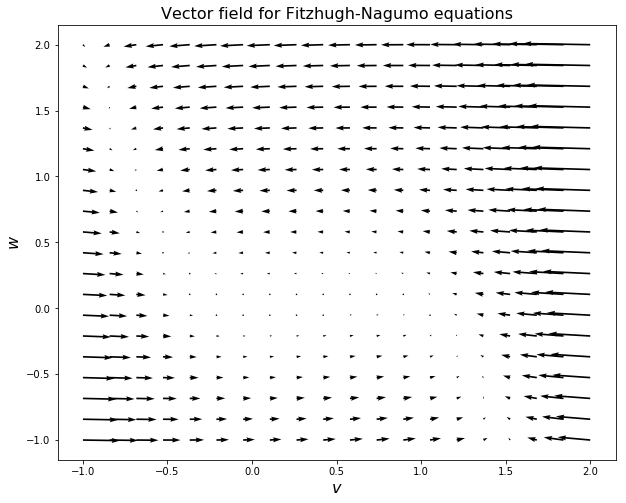

In [65]:
# Parameters
alpha = 0.1
gamma = 0.5
epsilon = 0.1
I_app = 0

# Define the f(v) function separately
def f(v):
    return v*(1 - v)*(v - alpha)

# Fitzhugh-Nagumo equations - these will pick up the parameter values above
def fhn(x):
    v, w = x[0], x[1]
    dv = 1/epsilon*(f(v) - w + I_app)
    dw = v - gamma*w
    return array([dv, dw])

def plot_vector_field():
    V, W = meshgrid(np.linspace(-1, 2, 20), np.linspace(-1, 2, 20))
    dV, dW = fhn([V, W])
    plt.quiver(V, W, dV, dW)
    plt.title('Vector field for Fitzhugh-Nagumo equations', fontsize=16)
    plt.xlabel('$v$', fontsize=16)
    plt.ylabel('$w$', fontsize=16)

plot_vector_field()

If we simulate our system numerically for a given choice of initial conditions. e.g. $v(0) = -1$, $w(0) = -0.5$, we can plot the resulting $v$, $w$ against each other to give a *trajectory*

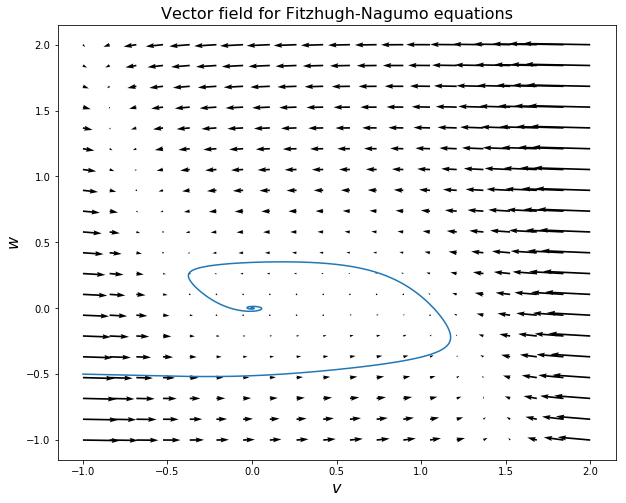

In [66]:
from scipy.integrate import odeint
# initial conditions and simulation time

v0, w0 = -1, -0.5
t = np.linspace(0, 10, 2000)
def compute_trajectory(v0, w0, t):
    # scipy's odeint does the heavy lifting for us. Its ode function requires an additional
    # t input, so that's what the lambda is doing. We could have just added this to fhn at the
    # start
    X = odeint(lambda x, t: fhn(x), [v0, w0], t)

    # Solution comes out as a big array with two columns, so pull v and w out
    v, w = X[:, 0], X[:, 1]
    return [v, w]

plot_vector_field()
v, w = compute_trajectory(v0, w0, t)
plt.plot(v, w)

Note that the trajectory is tangent to the vector field at all points.

## Nullclines
The first thing we do in the phase plane method is to compute the *nullclines* of our system. These are the curves were either $\frac{dv}{dt} = 0$ or $\frac{dw}{dt} = 0$. For our example:
\begin{equation*}
  \frac{dv}{dt} = 0 \implies w = f(v) + I_{\text{app}} = 0 
\end{equation*}
and
\begin{equation*}
  \frac{dw}{dt} = 0 \implies w = \frac{1}{\gamma} v.
\end{equation*}

Referring to our example, the curve $\frac{dv}{dt} = 0$ corresponds to all points where the velocity vector has no horizontal component, trajectories can only cross this nullcline vertically. Moreover, the sign of $\frac{dv}{dt}$ is fixed on either side of the nullcline, as the sign cannot change without passing back through it. For our example, $\frac{dv}{dt}$ is *positive* when we are below the nullcline, meaning trajectories move right when we are beneath it, and *negative* when we are above the nullcline, meaning trajectories will move left.

  


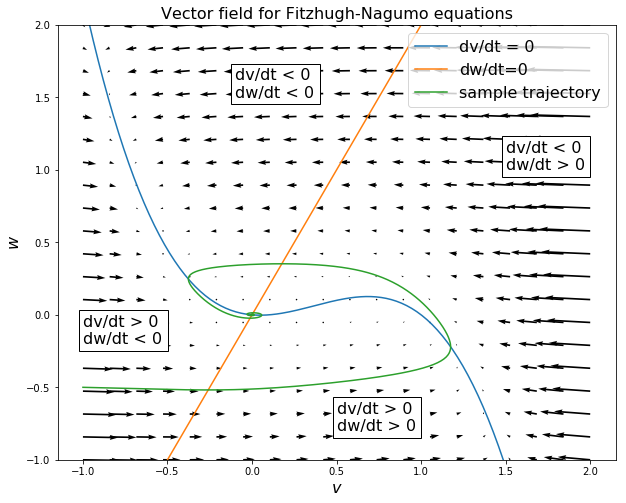

In [68]:
def null_v(v):
    return f(v) + I_app
def null_w(v):
    return 1/gamma*v
v_trajectory, w_trajectory = compute_trajectory(v0, w0, t)

v = np.linspace(-1, 2, 200)
plot_vector_field()
plt.plot(v, null_v(v), label='dv/dt = 0')
plt.plot(v, null_w(v), label='dw/dt=0')

plt.plot(v_trajectory, w_trajectory, label='sample trajectory')
plt.ylim([-1, 2])

text(-1, -0.2, 'dv/dt > 0 \ndw/dt < 0', fontsize=16, bbox=dict(alpha=1, facecolor='white'))
text(0.5, -0.8, 'dv/dt > 0 \ndw/dt > 0', fontsize=16, bbox=dict(alpha=1, facecolor='white'))
text(1.5, 1, 'dv/dt < 0 \ndw/dt > 0', fontsize=16, bbox=dict(alpha=1, facecolor='white'))
text(-0.1, 1.5, 'dv/dt < 0 \ndw/dt < 0', fontsize=16, bbox=dict(alpha=1, facecolor='white'))
plt.legend(fontsize=16)

You can see at this point that we can already understand quite a bit about how the system behaves. For our given trajectory, it starts in a regime where it is moving right and downward. When the trajectory crosses the $w$ nullcline (orange), it begins to move upward, but continues moving right until it hits the $v$ nullcline(blue). It crosses this nullcline vertically, and then begins to move left, still moving upward. It starts to move down after crossing the orange nullcline again, and then gradually spirals into the origin.

This simple piece of analysis (figuring out the nullclines) already gives us a lot of qualitative insight into how the ODE system behaves. Now, the next thing we have to do is look at the *steady states*, the points where the nullclines intersect.

## Steady states
The next thing that we want to do is to understand what kind of long term behaviour the system can exhibit. For our example we see that the trajectory we plotted spirals into the origin and seems to stay there. The origin is an example of what we call a *stable steady state*, i.e. is a point $\mathbf{x}^\star$ satisfying
\begin{equation}
    \mathbf{f}(\mathbf{x}^*) = \mathbf{0}.
\end{equation}
and for which trajectories starting near $\mathbf{x}^\star$ do not depart a small neighbourhood of it.

Some steady states are stable, some are unstable, and some look like a mixture. We're going to take a small digression and look at linear systems now.

## Digression: Linear autonomous systems
Forget our complicated example for a second, we're going to consider some simpler systems. Consider the system 
\begin{equation}
    \mathbf{x}' = A \mathbf{x}
\end{equation}
where $A$ is a 2x2 matrix. You may recall from your earlier studies that assuming $A$ has two linearly independent eigenvectors that the solution to this system is
\begin{equation}
    \mathbf{x}(t) = c_1 \mathbf{v}_1 \exp(\lambda_1 t) + c_2 \mathbf{v}_2 \exp(\lambda_2 t)
\end{equation}
where $\lambda_1, \lambda_2$ are the eigenvalues of $A$ (may be duplicate), and $\mathbf{v}_1, \mathbf{v}_2$ are the two corresponding eigenvectors. The constants are found by considering the initial conditions:
\begin{equation*}
    \begin{bmatrix} x_1(0) \\ x_2(0) \end{bmatrix} = 
    c_1 \mathbf{v_1} + c_2 \mathbf{v}_2
\end{equation*}
i.e. $c_1, c_2$ are the coefficients of $\mathbf{v}_1$ and $\mathbf{v}_2$ when expressing the initial condition using the eigenvectors as a basis.

If the eigenvectors are real, note that if $\mathbf{x}(0)$ is lined up with an eigenvector, then the other coefficient will be zero, and the trajectory will track this eigenvector into the origin (if $\lambda < 0$) or out to infinity (if $\lambda > 0$) or just stay put (if $\lambda = 0$).

There are a few typical cases that we frequently see (we'll ignore the zero real part possibilities):

### Two negative real eigenvalues: stable node
Considering the form of the solution, it is evident that if both eigenvalues have negative real part that $\mathbf{x}(t) \to \mathbf{0}$ as $t \to \infty$. In this case, the system is *stable* and we call the origin a *stable node*

### Two positive real eigenvalues: unstable node
This situation is the opposite of the previous one, no matter the initial condition the exponentials in the solution will blow up and the long term solution is infinite. We say the origin is an *unstable node*

### One positive, one negative real eigenvalue: saddle node
This one is interesting. If we start on the eigenvector corresponding to the negative eigenvalue, then the trajectory will hone in on the origin. This eigenvector is called the *stable manifold* of the steady state, the set of points for which the steady state is stable.

If we start anywhere else, the coefficient of the positive eigenvalue term will be nonzero and so eventually the positive exponential term will dominate.

### Complex (conjugate) eigenvalues, negative real parts: stable spiral
If $\lambda = a \pm ib$ with $a < 0$, then the solution takes the form
\begin{equation*}
    \mathbf{x}(t) = \exp(at)\left(\mathbf{u}_1 \cos bt + \mathbf{u}_2 \sin bt\right)
\end{equation*}
In this case the solution oscillates with decaying amplitude, and so in the phase plane it spirals into the origin. We call this a *stable spiral*.

### Complex (conjugate) eigenvalues, positive real parts: unstable spiral
Same as previously, except the exponential term corresponds to a growing exponential, and so trajectories spiral away from the origin. We call this an *unstable spiral*.

## Back to steady states: Hartman-Grobman Theorem
So why did we look at linear systems? Well, turns out that if we approximate our nonlinear system by a linear system near around a steady state, then due to a cool theorem called the *Hartman-Grobman Theorem*, that the nonlinear system is guaranteed to behave qualitatively the same as the linear system in some neighbourhood of the fixed point, so long as the real parts of the eigenvalues are nonzero.

### Approximating our nonlinear system by a linear one
So, how do we do this? Well, we can expand our system around the steady state in a 2D Taylor series. Let's assume $\mathbf{x}^\star$ is a steady state, i.e. $\mathbf{f}(\mathbf{x}^\star) = \mathbf{0}$. Then
\begin{align*}
    \mathbf{f}(\mathbf{x} - \mathbf{x}^\star) &= \mathbf{f}(\mathbf{x}^\star) + J(\mathbf{x}^\star)(\mathbf{x} - \mathbf{x}^\star) + \mathcal{O}(\lVert \mathbf{x} - \mathbf{x}^\star \rVert^2) \\
    &= J(\mathbf{x}^\star)(\mathbf{x} - \mathbf{x}^\star) + \mathcal{O}(\lVert \mathbf{x} - \mathbf{x}^\star \rVert^2)
\end{align*}
where $J(\mathbf{x})$ is the Jacobian of the system, evaluated at $\mathbf{x}$.

So, defining new coordinates $\mathbf{u} = \mathbf{x} - \mathbf{x}^\star$ so that the origin in $\mathbf{u}$-space is the steady state, we have that
\begin{align*}
    \mathbf{u}' &= J(\mathbf{x}^\star)\mathbf{u} + \text{higher order terms} \\
    &\approx J(\mathbf{x}^\star)\mathbf{u}.
\end{align*}
This approximation is a linear system, and so long as the eigenvalues of $J(\mathbf{x}^\star)$ have nonzero real parts, this approximation behaves the same way as the nonlinear system near the steady state.

### Fitzhugh-Nagumo equations
So let's look at the steady state of the Fitzhugh-Nagumo equations. We can see that the only steady state is at the origin by inspection, so we don't need to do any fancy variable translations. We need the Jacobian. If $\mathbf{x} = \begin{bmatrix} v & w \end{bmatrix}^T$, and express our system as
\begin{equation}
  \begin{split}
     \frac{dv}{dt} &= \frac{1}{\epsilon}\left(f(v) - w + I_{\text{app}}\right) = g(v, w) \\
     \frac{dw}{dt} &= v - \gamma w = h(v, w)
  \end{split}
\end{equation}

\begin{equation*}
    J(\mathbf{0}) = \begin{bmatrix}
        \frac{\partial g}{\partial v} & \frac{\partial g}{\partial w} \\
        \frac{\partial h}{\partial v} & \frac{\partial h}{\partial w}
    \end{bmatrix}(\mathbf{0}) = 
    \begin{bmatrix}
        \frac{1}{\epsilon}\left(-3v^2 + 2(\alpha + 1)v - \alpha\right) & -\frac{1}{\epsilon} \\
        1 & -\gamma
    \end{bmatrix}(\mathbf{0}) = \begin{bmatrix}
    -\frac{\alpha}{\epsilon} & -\frac{1}{\epsilon} \\
    1 & -\gamma
    \end{bmatrix}
\end{equation*}

For our choice of parameters, this matrix has eigenvalues $\lambda \approx -5.25 \pm 8.8i$, which makes the steady state of the linear system, and hence locally the nonlinear system, a *stable spiral*.